<div style="font-size:18px; font-family:'Tahoma'; direction:rtl; color:purple;">
    <br>
نام ارائه دهنده: مرجان چوداری میلانی.<br><br>
استاد : جناب دکتر مقسمی .<br><br>
درس : یادگیری ماشین.<br><br>
    <div style="font-size:20px; font-family:'Tahoma'; direction:rtl; color:Red;">
    <center> << پیش بینی قیمت سهام >>
        <br><br> </center> </div>
    <br>
    این پروژه درباره‌ی پیش‌بینی قیمت سهام کارخانه‌ی TaTa  در هند است که داده های قیمت سهام این کارخانه از سال 2010 تا 2018 جمع‌آوری شده است و قرار است در این پروژه طبق این داده‌ها قیمت سهام روزهای بعد را پیش بینی نماییم.<br><br> الگوریتمی که در این پروژه به کار رفته است شبکه عصبی LSTM   می‌باشد.
<br><br>
شبکه‌ی عصبیLSTM   یا شبکه‌ی حافظه‌ی کوتاه مدت:
<br><br>
به صورت زنجیره‌ای بازگشتی پشت‌سر هم قرار میگیرد و وابسته به یادگیری مسائل به ترتیب توالی پیش‌بینی است. 
<br><br>
در ترجمه‌ی ماشینی و تشخیص صدا و ... استفاده میشود. 
<br><br>
این الگوریتم یک قسمت پیچیده از یادگیری عمیق است.


</div>


In [1]:
# Importing the libraries - معرفی کتابخانه ها
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<div style="font-size:18px; font-family:'Tahoma'; direction:rtl; color:brown;">
    وارد کردن داده های  Train با کتابخانه ی pandas داخل متغیر dataset_train  
<br>
شامل بالاترین مقدار، پایین ترین مقدار ، آخرین مقدار ، تاریخ و گردش مالی هر روز است. <br>
 
</div>


In [2]:
# Importing the training set - وارد کردن دیتا ست
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')


<div style="font-size:18px; font-family:'Tahoma'; direction:rtl; color:brown;">
ستون اول و دوم تمامی ردیف هارو توسط تابع iloc بریز داخل متغیر dataset_train
</div>


In [3]:
#located the rows 
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)


[[234.05]
 [234.55]
 [240.  ]
 ...
 [121.8 ]
 [120.3 ]
 [122.1 ]]


In [4]:
# show the first rows - نمایش 5 ردیف اول
dataset_train.head(5)


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


<div style="font-size:18px; font-family:'Tahoma'; direction:rtl; color:brown;">
sklearn کتابخانه ای برای یادگیری ماشین است
<br>
در این قسمت برای پیش پردازش این کتابخانه از minmaxscaler استفاده شده که اگر داده ی منفی داشته باشیم آنهارا در محدوده ی -1 تا 1 و یا 0 تا 1 دسته بندی میکند.<br>
<gray> داده های training_set  را مقیاس بندی میکنه و داخل متغیر trainingset_scaled میریزه.
</div>


In [5]:
#import the sklearn 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

<div style="font-size:18px; font-family:'Tahoma'; direction:rtl; color:brown;">
    دو آرایه خالی تعریف میکند.<br>
    یک حلقه داریم در محدوده ی 60 تا 2035 که یک خروجی دارد.<br>
    علت اینکه از 60 شروع کرده نه از 1 قانون پارتو هست.<br>
    برای آرایه X,Y یکسری ورودی میگیره 
</div>

In [6]:
X_train = []
y_train = []
print(X_train)
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train =np.array(X_train), np.array(y_train)
#print(X_train)
# print(y_train)

[]



<div style="font-size:18px; font-family:'Tahoma'; direction:rtl; color:brown;">
  تابع reshape سطر و ستون یک ماتریس رو جا به جا میکند.
</div>


In [7]:
# Reshaping - تغییر شکل
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

[[[0.6202352 ]
  [0.62226277]
  [0.64436334]
  ...
  [0.79622871]
  [0.81062449]
  [0.74371452]]

 [[0.62226277]
  [0.64436334]
  [0.61719384]
  ...
  [0.81062449]
  [0.74371452]
  [0.77007299]]

 [[0.64436334]
  [0.61719384]
  [0.61820762]
  ...
  [0.74371452]
  [0.77007299]
  [0.73641525]]

 ...

 [[0.19870235]
  [0.21796431]
  [0.21553122]
  ...
  [0.14963504]
  [0.14801298]
  [0.15815085]]

 [[0.21796431]
  [0.21553122]
  [0.20600162]
  ...
  [0.14801298]
  [0.15815085]
  [0.16504461]]

 [[0.21553122]
  [0.20600162]
  [0.21654501]
  ...
  [0.15815085]
  [0.16504461]
  [0.15896188]]]


<div style="font-size:18px; font-family:'Tahoma'; direction:rtl; color:brown;">
معرفی کتابخانه ی keras
</div>


In [11]:
# Importing the Keras libraries and packages - معرفی کتابخانه ی کراس 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

AttributeError: module 'keras.utils.generic_utils' has no attribute 'populate_dict_with_module_objects'

<div style="font-size:18px; font-family:'Tahoma'; direction:rtl; color:brown;">
مقدار دهی اولیه RNN
<br>
تابعsequential رو میریزه داخل متغیر regressor
<br>
<div style="color:gray;">
اضافه کردن لایه اول از LSTM و بعضی تنظیمات Dropout
    </div>
توالی بازگشت داریم که یعنی توالی کامل رو برمیگردونه
</div>


In [12]:
# Initialising the RNN -  مقدار دهی اولیه
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

NameError: name 'Sequential' is not defined

<div style="font-size:18px; font-family:'Tahoma'; direction:rtl; color:brown;">
اضافه کردن لایه دوم
<br>
 در این قسمت input_shape وارد نمیکنیم چون فقط لایه اول نیاز به این داشت
</div>

In [13]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

NameError: name 'regressor' is not defined

In [14]:
# اضافه کردن لایه سوم همانند لایه دوم
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

NameError: name 'regressor' is not defined

In [15]:
#اضافه کردن لایه چهارم همانند لایه دوم
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


NameError: name 'regressor' is not defined

<div style="font-size:18px; font-family:'Tahoma'; direction:rtl; color:brown;">
لایه خروجی را اضافه میکنه به regressor
<br>
  کد "compile" یک رشته را به شی تغییر میدهد.
   <br>
    batch size تعداد پردازش هایی که میخواهیم همزمان انجام شود
<br>

</div>


In [16]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



NameError: name 'regressor' is not defined

<div style="font-size:18px; font-family:'Tahoma'; direction:rtl; color:brown;">
مرحله ی پیش بینی و نمایش نتیجه :
    <br>
    دریافت سهام های واقعی سال 2017
توسط کتابخانه ی pandas فایل را میخونه و داخل dataset میریزه
    <br>
    توسط تابع iloc تمامی ردیف های ستون اول و دوم دیتاست را میریزه داخل متغیر real stock price

</div>


In [17]:
# پیشبینی 

# Getting the real stock price of 2017
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

<div style="font-size:18px; font-family:'Tahoma'; direction:rtl; color:brown;">
داخل متغیر total dataset ردیفی که از concat دیتا ست های train و test بدست آورده را میریزد
<br>
   اندازه ی لیست total data set و dataset test رو از هم کم میکنه وعدد 60 را از آن کم میکند 
    عدد بدست آمده ردیف ما است.
    و همه ی ستون هارا میخواهیم 
    <br>
    
    
    
</div>


In [18]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
test_y_ = regressor.predict(X_train)

NameError: name 'regressor' is not defined

<div style="font-size:18px; font-family:'Tahoma'; direction:rtl; color:brown;">
    نمایش به صورت نمودار
</div>


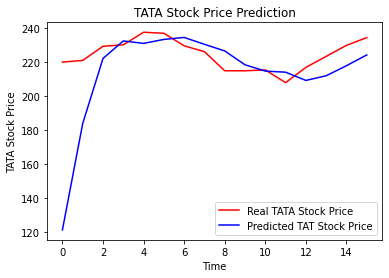

In [16]:
# Visualising the results
# خط قرمز سهام واقعی را نمایش میدهد و خط آبی پیش بینی شده را
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y , test_y_) )